<a href="https://colab.research.google.com/github/11muskansingh/NLP_Practice/blob/main/Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install gensim nltk

In [3]:
import nltk
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')

##load dataset as list of tokenized sentences
sentences = [list(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()]

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [4]:
from gensim.models import Word2Vec

In [5]:
### CBOW model
cbow_model=Word2Vec(sentences=sentences,vector_size=100,window=5,min_count=2,sg=0)

In [8]:
# Most similar words
print("Most similar word to good => \n",cbow_model.wv.most_similar('good'))

Most similar word to good => 
 [('bad', 0.8579267263412476), ('great', 0.818581223487854), ('nice', 0.8020880818367004), ('funny', 0.7891667485237122), ('fun', 0.7190040349960327), ('cool', 0.7187061309814453), ('decent', 0.6981266736984253), ('perfect', 0.6900438666343689), ('scary', 0.6861575841903687), ('fine', 0.6809415221214294)]


In [9]:
# Get vector of a word
print("Vector of a word \n",cbow_model.wv['movie'])

Vector of a word 
 [-0.20679277 -0.66715527 -1.3638133   2.4909809   0.4134246  -0.5602418
  0.19780119 -0.7903012   0.6125936  -1.3507417   0.9084192  -0.13280958
  0.794738   -0.59577453  2.824963    1.2224447   0.05531903 -1.2165896
  1.6763357   0.25387526 -0.70876664  0.22829601 -0.03897847 -0.8818584
  0.14342864 -0.2409996   0.6688859   2.4245946   0.90145105  0.4293839
  0.26527452  0.08904129 -0.10243753 -0.57651454  0.33689475  1.1923156
  1.8389797  -2.8349814  -1.1765275   2.0417242  -0.28959367 -0.6240826
 -0.4942918  -2.1808002  -0.613008   -2.1160402   3.3739257  -0.08011492
 -0.86825466  1.3552706  -0.20507874 -0.5182129  -0.93385345  1.8231155
  1.4133214  -0.3661619  -0.54361445  0.8495355  -0.7136803   0.9712077
 -0.33099288 -0.531314    3.238647    1.6599041   1.5498585  -0.2667367
  3.136782    1.3259367  -2.2946966   2.3192356   0.34597805 -1.1056672
  1.0891049  -1.5099016  -0.09056994  0.48479715 -1.0768453  -0.3345118
 -0.43300995  2.2576945   1.5780401  -2.138

In [10]:
# Similarity between two words
print("Similarity between 2 words",cbow_model.wv.similarity('good', 'great'))

Similarity between 2 words 0.81858116


In [11]:
# Check vocabulary
print("Checking Vocab",'film' in cbow_model.wv)

Checking Vocab True


In [12]:
### Skip-Grams Model
skip_grams_model=Word2Vec(sentences=sentences,vector_size=100,window=5,sg=1)

In [13]:
# Most similar words
print("Most similar word to good => \n",skip_grams_model.wv.most_similar('good'))

Most similar word to good => 
 [('decent', 0.7655038833618164), ('bad', 0.6876765489578247), ('great', 0.6868525147438049), ('lousy', 0.6501531600952148), ('fine', 0.6407373547554016), ('watchable', 0.6299425363540649), ('poor', 0.6262545585632324), ('commendable', 0.6242780685424805), ('passable', 0.6236396431922913), ('terrible', 0.6180713772773743)]


In [14]:
# Get vector of a word
print("Vector of a word \n",skip_grams_model.wv['movie'])

Vector of a word 
 [ 0.16170155  0.06022731 -0.01211318  0.04221794 -0.00301718 -0.20534125
 -0.14231409  0.12548961  0.14476448 -0.27380562  0.04734129 -0.28709745
  0.22688054 -0.20818952  0.3624251   0.22084588 -0.14136627 -0.15898474
  0.09834848 -0.47840062  0.11622676  0.1775674  -0.03494236 -0.10185897
 -0.15913069  0.07148008 -0.76109827  0.02966646  0.01996687  0.40353048
 -0.44253886 -0.25873283  0.27308452 -0.4994709  -0.13658004  0.03221684
  0.27214926 -0.13244279 -0.10322393  0.05200595  0.5999841  -0.19220774
 -0.16135417 -0.13583538  0.16513917 -0.25749388 -0.08837088 -0.19278637
  0.17690906  0.29109296 -0.05038921 -0.06710427 -0.32953593 -0.06993473
  0.29127687 -0.16589084  0.04361059 -0.02541984 -0.05285815  0.35814708
 -0.56401354  0.4048547   0.16373482  0.31265283  0.35348305  0.24052607
  0.29786256  0.21771175 -0.01849137  0.64836717 -0.01551426  0.33887425
  0.48772728 -0.18751974  0.00552514  0.17703192 -0.09002531  0.21504632
 -0.3077171   0.14200015 -0.5193

In [15]:
# Similarity between two words
print("Similarity between 2 words",skip_grams_model.wv.similarity('good', 'great'))

Similarity between 2 words 0.68685246


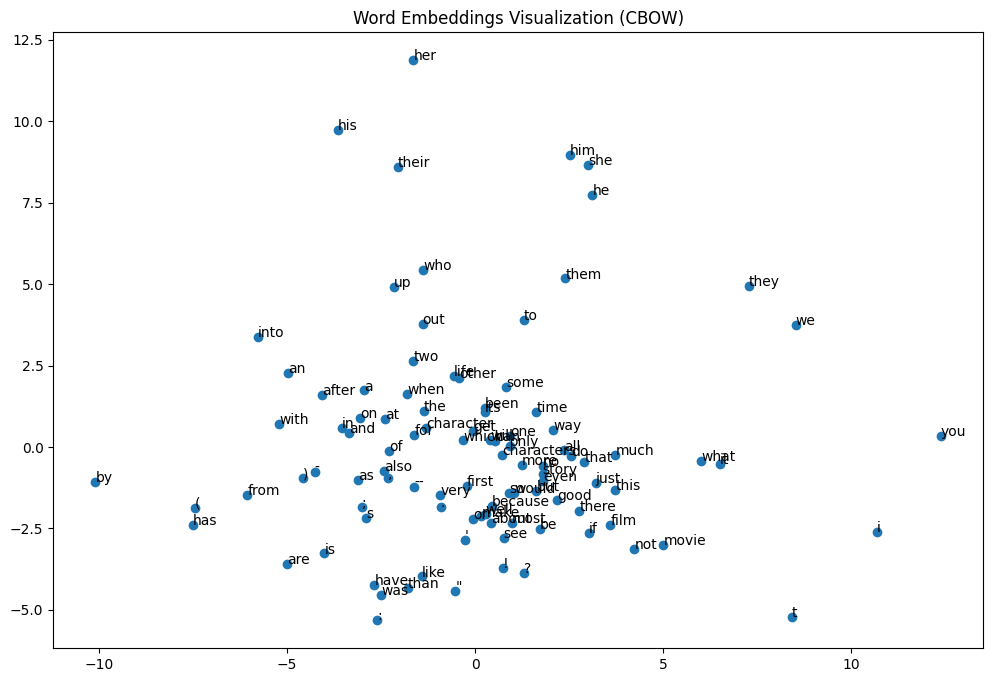

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Take top 100 words from the vocabulary
words = list(cbow_model.wv.index_to_key[:100])  # Most frequent 100 words

# 2. Get their 100-dim vectors
vectors = cbow_model.wv[words]

# 3. Apply PCA: reduce from 100D → 2D
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# 4. Plot the result using matplotlib
plt.figure(figsize=(12, 8))
plt.scatter(result[:, 0], result[:, 1])

# 5. Annotate each point with the word
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title("Word Embeddings Visualization (CBOW)")
plt.show()
